<a href="https://colab.research.google.com/github/Nilufayeasmin299/Phishig-detection-using-both-machine-learning-and-deep-learning-techniques/blob/main/Phishing_detection_ML_before_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # **Loading Data**

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/Second paper/Dataset/URL-Dataset.csv')
data0.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


# **Familiarizing with Data**

In [ ]:
#Checking the shape of the dataset
data0.shape

(11055, 31)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
#Finding out the distribution of the class labels
from collections import Counter

classes = Counter(data0['Result'].values)
classes.most_common()

[(1, 6157), (0, 4898)]

In [ ]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,0,4898


# **Visualizing the data**

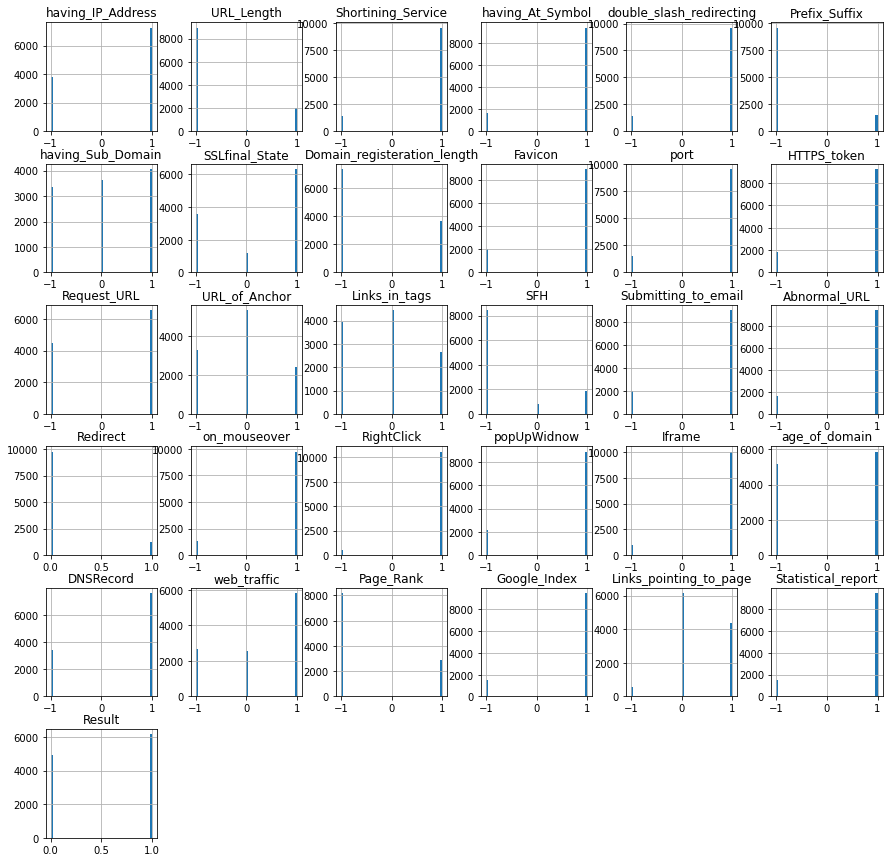

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

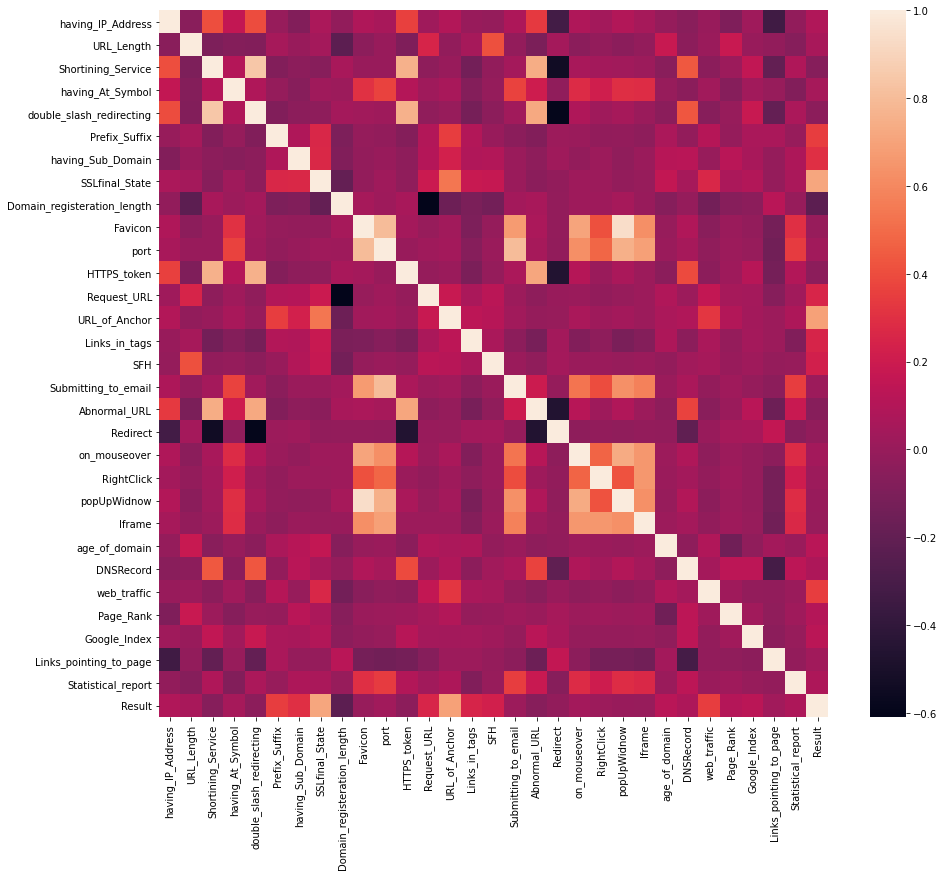

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **Data Preprocessing & EDA**

In [ ]:
data0.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.556943
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.496769
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dropping the Domain column
#data = data0.drop(['Domain'], axis = 1).copy()
data=data0

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,-1,1,0,1,1
1,-1,-1,-1,1,-1,-1,0,0,-1,1,1,-1,-1,-1,1,-1,1,-1,0,1,1,1,1,1,-1,-1,1,1,0,1,0
2,1,-1,-1,1,-1,-1,0,-1,1,1,1,-1,-1,-1,1,-1,1,-1,0,1,1,1,1,-1,-1,-1,-1,-1,0,1,0
3,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,0
4,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,1


# **Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((11055, 30), (11055,))

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X) 
y_train=y

In [ ]:
# Applying k-Fold Cross Validation 
from sklearn import model_selection
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score, make_scorer
scoring={'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),
         'recall':make_scorer(recall_score),'f1':make_scorer(f1_score)}

# **Machine Learning Models & Training**

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_cross = []
acc_error=[]
pre_cross = []
pre_error = []
rec_cross = []
rec_error = []
f1_cross = []
f1_error = []
ex_time = []
#function to call for storing the results
def storeResults(model, a,ae,p,pe,r,re,f,fe,t):
  ML_Model.append(model)
  acc_cross.append(round(a,3))
  acc_error.append(round(ae,3))
  pre_cross.append(round(p,3))
  pre_error.append(round(pe,3))
  rec_cross.append(round(r,3))
  rec_error.append(round(re,3))
  f1_cross.append(round(f,3))
  f1_error.append(round(fe,3))
  ex_time.append(round(t,3))

 # **Decision Tree Classifier**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

In [ ]:
#applying kfold cross validation on model
results_dt = model_selection.cross_validate(tree.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_dt['test_accuracy'])
acc_err=np.std(results_dt['test_accuracy'])
pre=np.mean(results_dt['test_precision'])
pre_err=np.std(results_dt['test_precision'])
rec=np.mean(results_dt['test_recall'])
rec_err=np.std(results_dt['test_recall'])
f1=np.mean(results_dt['test_f1'])
f1_err=np.std(results_dt['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.919 +/- 0.010
Precision: 0.900 +/- 0.012
Recall: 0.963 +/- 0.021
F1 Score: 0.930 +/- 0.009


### **Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('Decision Tree', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **Random Forest Classifier**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

In [ ]:
#applying kfold cross validation on model
results_rf = model_selection.cross_validate(forest.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_rf['test_accuracy'])
acc_err=np.std(results_rf['test_accuracy'])
pre=np.mean(results_rf['test_precision'])
pre_err=np.std(results_rf['test_precision'])
rec=np.mean(results_rf['test_recall'])
rec_err=np.std(results_rf['test_recall'])
f1=np.mean(results_rf['test_f1'])
f1_err=np.std(results_rf['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.930 +/- 0.007
Precision: 0.919 +/- 0.005
Recall: 0.960 +/- 0.010
F1 Score: 0.939 +/- 0.006


#### **Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('Random Forest', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **AdaBoost Classifier**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)

In [ ]:
#applying kfold cross validation on model
results_adc = model_selection.cross_validate(adc.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_adc['test_accuracy'])
acc_err=np.std(results_adc['test_accuracy'])
pre=np.mean(results_adc['test_precision'])
pre_err=np.std(results_adc['test_precision'])
rec=np.mean(results_adc['test_recall'])
rec_err=np.std(results_adc['test_recall'])
f1=np.mean(results_adc['test_f1'])
f1_err=np.std(results_adc['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.917 +/- 0.009
Precision: 0.924 +/- 0.007
Recall: 0.928 +/- 0.012
F1 Score: 0.926 +/- 0.009


### **Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('AdaBoost Classifier', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **XGBoost Classifier**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
# instantiate the model 
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

In [ ]:
#applying kfold cross validation on model
results_xgb = model_selection.cross_validate(xgb.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_xgb['test_accuracy'])
acc_err=np.std(results_xgb['test_accuracy'])
pre=np.mean(results_xgb['test_precision'])
pre_err=np.std(results_xgb['test_precision'])
rec=np.mean(results_xgb['test_recall'])
rec_err=np.std(results_xgb['test_recall'])
f1=np.mean(results_xgb['test_f1'])
f1_err=np.std(results_xgb['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.974 +/- 0.003
Precision: 0.972 +/- 0.005
Recall: 0.981 +/- 0.004
F1 Score: 0.976 +/- 0.003


### **Storing the results:**



In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('XGBoost classifier', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **Support Vector Machine**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
# SVM model 
from sklearn.svm import SVC 

# instantiate the model 
svm = SVC(kernel='linear', C=1.0, random_state=12)

In [ ]:
#applying kfold cross validation on model
results_svm = model_selection.cross_validate(svm.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_svm['test_accuracy'])
acc_err=np.std(results_svm['test_accuracy'])
pre=np.mean(results_svm['test_precision'])
pre_err=np.std(results_svm['test_precision'])
rec=np.mean(results_svm['test_recall'])
rec_err=np.std(results_svm['test_recall'])
f1=np.mean(results_svm['test_f1'])
f1_err=np.std(results_svm['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.928 +/- 0.007
Precision: 0.926 +/- 0.009
Recall: 0.946 +/- 0.009
F1 Score: 0.936 +/- 0.006


###**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('Support Vector Machine', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **K-nearest neighbors**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
# K-nearest neighbors model 
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
knn=KNeighborsClassifier()

In [ ]:
#applying kfold cross validation on model
results_knn = model_selection.cross_validate(knn.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_knn['test_accuracy'])
acc_err=np.std(results_knn['test_accuracy'])
pre=np.mean(results_knn['test_precision'])
pre_err=np.std(results_knn['test_precision'])
rec=np.mean(results_knn['test_recall'])
rec_err=np.std(results_knn['test_recall'])
f1=np.mean(results_knn['test_f1'])
f1_err=np.std(results_knn['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.948 +/- 0.005
Precision: 0.949 +/- 0.009
Recall: 0.958 +/- 0.007
F1 Score: 0.953 +/- 0.005


 ### **Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('K-nearest neighbors', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

#**Gaussian Naive-Bayes**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
# Gaussian Naive-Bayes model 
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
gnb=GaussianNB()

In [ ]:
#applying kfold cross validation on model
results_gnb = model_selection.cross_validate(gnb.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_gnb['test_accuracy'])
acc_err=np.std(results_gnb['test_accuracy'])
pre=np.mean(results_gnb['test_precision'])
pre_err=np.std(results_gnb['test_precision'])
rec=np.mean(results_gnb['test_recall'])
rec_err=np.std(results_gnb['test_recall'])
f1=np.mean(results_gnb['test_f1'])
f1_err=np.std(results_gnb['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.598 +/- 0.009
Precision: 0.997 +/- 0.005
Recall: 0.279 +/- 0.016
F1 Score: 0.436 +/- 0.019


#### **Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('Gaussian Naive-Bayes', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **Multilayer Perceptrons (MLPs): Deep Learning**

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

In [ ]:
#applying kfold cross validation on model
results_mlp = model_selection.cross_validate(mlp.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

#### **Performance Evaluation:**

In [ ]:
acc=np.mean(results_mlp['test_accuracy'])
acc_err=np.std(results_mlp['test_accuracy'])
pre=np.mean(results_mlp['test_precision'])
pre_err=np.std(results_mlp['test_precision'])
rec=np.mean(results_mlp['test_recall'])
rec_err=np.std(results_mlp['test_recall'])
f1=np.mean(results_mlp['test_f1'])
f1_err=np.std(results_mlp['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (acc,acc_err))
print('Precision: %.3f +/- %.3f' % (pre,pre_err))
print('Recall: %.3f +/- %.3f' % (rec,rec_err))
print('F1 Score: %.3f +/- %.3f' % (f1,f1_err))

Cross Validation accuracy: 0.970 +/- 0.005
Precision: 0.969 +/- 0.006
Recall: 0.978 +/- 0.006
F1 Score: 0.973 +/- 0.004


### **Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
p=time.perf_counter()
tme=p-tic
tic=p
storeResults('Multilayer Perceptrons Classifier', acc,acc_err,pre,pre_err,rec,rec_err,f1,f1_err,tme)

# **Comparision of Models**

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Acc(mean)': acc_cross,'error(+/-':acc_error,'precision(mean)':pre_cross,'error(+/-)':pre_error,
    'recall(mean)':rec_cross,'error(+/-)':rec_error,'f1(mean)':f1_cross,'error(+/-)':f1_error,
    'Execution Time':ex_time})
results

,ML Model,Acc(mean),error(+/-,precision(mean),error(+/-),recall(mean),f1(mean),Execution Time
0,Decision Tree,0.919,0.010,0.900,0.009,0.963,0.930,0.443
1,Random Forest,0.930,0.007,0.919,0.006,0.960,0.939,4.778
2,AdaBoost Classifier,0.917,0.009,0.924,0.009,0.928,0.926,0.633
3,XGBoost classifier,0.974,0.003,0.972,0.003,0.981,0.976,22.266
4,Support Vector Machine,0.928,0.007,0.926,0.006,0.946,0.936,27.525
5,K-nearest neighbors,0.948,0.005,0.949,0.005,0.958,0.953,7.228
6,Gaussian Naive-Bayes,0.598,0.009,0.997,0.019,0.279,0.436,0.196
7,Multilayer Perceptrons Classifier,0.970,0.005,0.969,0.004,0.978,0.973,157.277


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Acc(mean)'], ascending=False)

,ML Model,Acc(mean),error(+/-,precision(mean),error(+/-),recall(mean),f1(mean),Execution Time
3,XGBoost classifier,0.974,0.003,0.972,0.003,0.981,0.976,22.266
7,Multilayer Perceptrons Classifier,0.970,0.005,0.969,0.004,0.978,0.973,157.277
5,K-nearest neighbors,0.948,0.005,0.949,0.005,0.958,0.953,7.228
1,Random Forest,0.930,0.007,0.919,0.006,0.960,0.939,4.778
4,Support Vector Machine,0.928,0.007,0.926,0.006,0.946,0.936,27.525
0,Decision Tree,0.919,0.010,0.900,0.009,0.963,0.930,0.443
2,AdaBoost Classifier,0.917,0.009,0.924,0.009,0.928,0.926,0.633
6,Gaussian Naive-Bayes,0.598,0.009,0.997,0.019,0.279,0.436,0.196


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Execution Time'], ascending=False)

,ML Model,Acc(mean),error(+/-,precision(mean),error(+/-),recall(mean),f1(mean),Execution Time
7,Multilayer Perceptrons Classifier,0.970,0.005,0.969,0.004,0.978,0.973,157.277
4,Support Vector Machine,0.928,0.007,0.926,0.006,0.946,0.936,27.525
3,XGBoost classifier,0.974,0.003,0.972,0.003,0.981,0.976,22.266
5,K-nearest neighbors,0.948,0.005,0.949,0.005,0.958,0.953,7.228
1,Random Forest,0.930,0.007,0.919,0.006,0.960,0.939,4.778
2,AdaBoost Classifier,0.917,0.009,0.924,0.009,0.928,0.926,0.633
0,Decision Tree,0.919,0.010,0.900,0.009,0.963,0.930,0.443
6,Gaussian Naive-Bayes,0.598,0.009,0.997,0.019,0.279,0.436,0.196
